## Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Normalizing

In [7]:
# to visualize we use only last two columns
X = dataset.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
# scaling 0 means and unit variance
stscaler = StandardScaler().fit(X)
X = stscaler.transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## DBSCAN object

In [10]:
# creating a DBSCAN object that requires a minimum of 5 data points in a neighbourhood of radius 0.3 to be considered a core point
dbsc = DBSCAN(eps = .3, min_samples = 5).fit(X)


## Plotting the clusters

No.of clusters:	 7


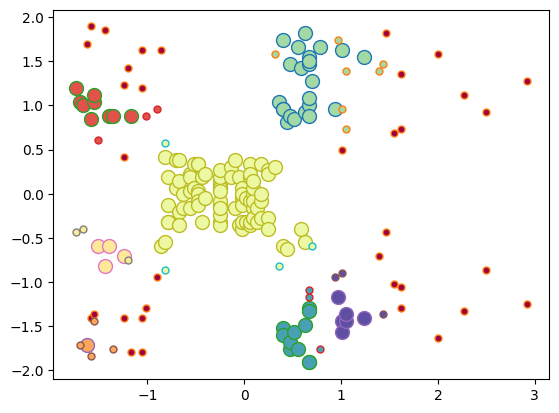

In [ ]:
# cluster labels
labels = dbsc.labels_ 

# identifying the points which makes up our core points
core_samples = np.zeros_like(labels, dtype = bool) 
core_samples[dbsc.core_sample_indices_] = True 

# unique cluster labels
unique_labels = np.unique(labels) 
# colours to each cluster
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

# no.of clusters
# deduct 1 from no.of unique labels if -1 is a label
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
print("No.of clusters:\t", n_clusters_)
 
for (label, color) in zip(unique_labels, colors): 
    class_member_mask = (labels == label) 
    n = X[class_member_mask & core_samples] 
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 10) 
     
    n = X[class_member_mask & ~core_samples] 
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 5)